In [1]:
# Comment: Installing pandas and scikit-learn if not already available in Colab
!pip install pandas scikit-learn matplotlib seaborn

# Comment: Importing essential libraries
import pandas as pd              # For data handling
import numpy as np               # For numerical calculations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns            # For better visualization
from sklearn.model_selection import train_test_split  # For splitting dataset
from sklearn.tree import DecisionTreeRegressor        # Our ML model
from sklearn import metrics      # For evaluation (MAE, MSE, RMSE, R2 Score)



In [2]:
# Comment: Load the Mumbai house dataset (CSV file uploaded in Colab session)
from google.colab import files
uploaded = files.upload()   # Will open file selector, upload 'mumbai_house.csv'

# Comment: Read dataset into pandas DataFrame
df = pd.read_csv("mumbai_house.csv")

# Comment: Show first 5 rows
df.head()


Saving mumbai_house.csv to mumbai_house.csv


,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [3]:
# Comment: Display shape (rows, columns)
print("Dataset shape:", df.shape)

# Comment: Display column names
print("Columns:", df.columns)

# Comment: Display dataset information (types, null values)
df.info()

# Comment: Basic statistics of numerical columns
df.describe()

# Comment: Check missing values
df.isnull().sum()


Dataset shape: (76038, 9)
Columns: Index(['bhk', 'type', 'locality', 'area', 'price', 'price_unit', 'region',
       'status', 'age'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bhk         76038 non-null  int64  
 1   type        76038 non-null  object 
 2   locality    76038 non-null  object 
 3   area        76038 non-null  int64  
 4   price       76038 non-null  float64
 5   price_unit  76038 non-null  object 
 6   region      76038 non-null  object 
 7   status      76038 non-null  object 
 8   age         76038 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 5.2+ MB


,0
bhk,0
type,0
locality,0
area,0
price,0
price_unit,0
region,0
status,0
age,0


In [5]:
# ---- Fixed preprocessing for Mumbai dataset ----

# 1) Separate target safely (target is 'price' in lowercase)
y = df['price']                             # Target: house price
X_raw = df.drop(columns=['price'])          # Features: every column except target

# 2) Identify column types automatically (so we don't guess wrong names)
num_cols = X_raw.select_dtypes(include=['number']).columns.tolist()              # numeric columns
cat_cols = X_raw.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()  # categorical/boolean columns

# 3) Optionally handle missing values ONLY if present (kept conditional)
#    Fill numeric NaNs with median (robust) and categorical NaNs with mode
if X_raw[num_cols].isnull().sum().sum() > 0:                                    # check if any numeric NaNs exist
    X_raw[num_cols] = X_raw[num_cols].fillna(X_raw[num_cols].median())          # fill numeric NaNs with median

for c in cat_cols:                                                               # loop each categorical column
    if X_raw[c].isnull().sum() > 0:                                             # if this column has NaNs
        X_raw[c] = X_raw[c].fillna(X_raw[c].mode(dropna=True)[0])               # fill with mode (most frequent)

# 4) One-hot encode categorical columns (creates 0/1 dummy columns)
#    drop_first=True reduces redundancy; keeps model simple
X_encoded = pd.get_dummies(X_raw, columns=cat_cols, drop_first=True)

# 5) Final feature matrix is X_encoded; print shapes to verify
print("Numeric cols:", len(num_cols), "| Categorical cols:", len(cat_cols))
print("X_encoded shape:", X_encoded.shape, "| y shape:", y.shape)

# 6) Peek at the transformed features
X_encoded.head()


Numeric cols: 2 | Categorical cols: 6
X_encoded shape: (55726, 10018) | y shape: (55726,)


,bhk,area,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,locality_ Akruti,locality_ Amber Heights,locality_ Arcade,locality_ Asbury Park,...,region_Warai,region_Worli,region_kandivali,region_kasaradavali thane west,region_mumbai,region_sector,region_vile parle west,status_Under Construction,age_Resale,age_Unknown
0,3,685,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,640,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2,610,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,2,876,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,2,659,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [6]:
# Print column names to confirm exact spellings (important because column names are case-sensitive)
print("Columns:", df.columns.tolist())

# Quick null check to see if any column has missing values
print("\nMissing values per column:\n", df.isnull().sum())


Columns: ['bhk', 'type', 'locality', 'area', 'price', 'price_unit', 'region', 'status', 'age']

Missing values per column:
 bhk           0
type          0
locality      0
area          0
price         0
price_unit    0
region        0
status        0
age           0
dtype: int64


In [7]:
from sklearn.model_selection import train_test_split  # split utility

# Split data into train and test sets (80/20); random_state fixes reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Show resulting sizes so we know it worked
print("X_train:", X_train.shape, "| X_test:", X_test.shape)
print("y_train:", y_train.shape, "| y_test:", y_test.shape)


X_train: (44580, 10018) | X_test: (11146, 10018)
y_train: (44580,) | y_test: (11146,)


In [8]:
from sklearn.tree import DecisionTreeRegressor  # model

# Initialize a reasonably constrained tree to avoid overfitting initially
dt = DecisionTreeRegressor(max_depth=7, random_state=42)  # tweak max_depth later if needed

# Fit the model on training data
dt.fit(X_train, y_train)

print("Model trained.")


Model trained.


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # metrics
import numpy as np  # for sqrt

# Predict on the test set (unseen data)
y_pred = dt.predict(X_test)

# Compute regression metrics
mae  = mean_absolute_error(y_test, y_pred)                 # average absolute error
mse  = mean_squared_error(y_test, y_pred)                  # average squared error
rmse = np.sqrt(mse)                                        # root mean squared error (same units as price)
r2   = r2_score(y_test, y_pred)                            # coefficient of determination (closer to 1 is better)

# Print a neat summary
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²  : {r2:.4f}")


MAE : 6.8868
RMSE: 12.2131
R²  : 0.8636


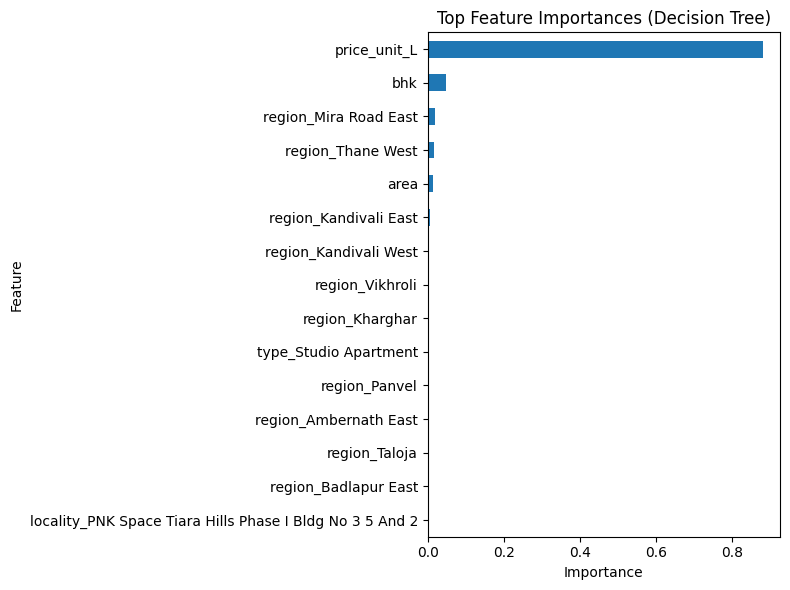

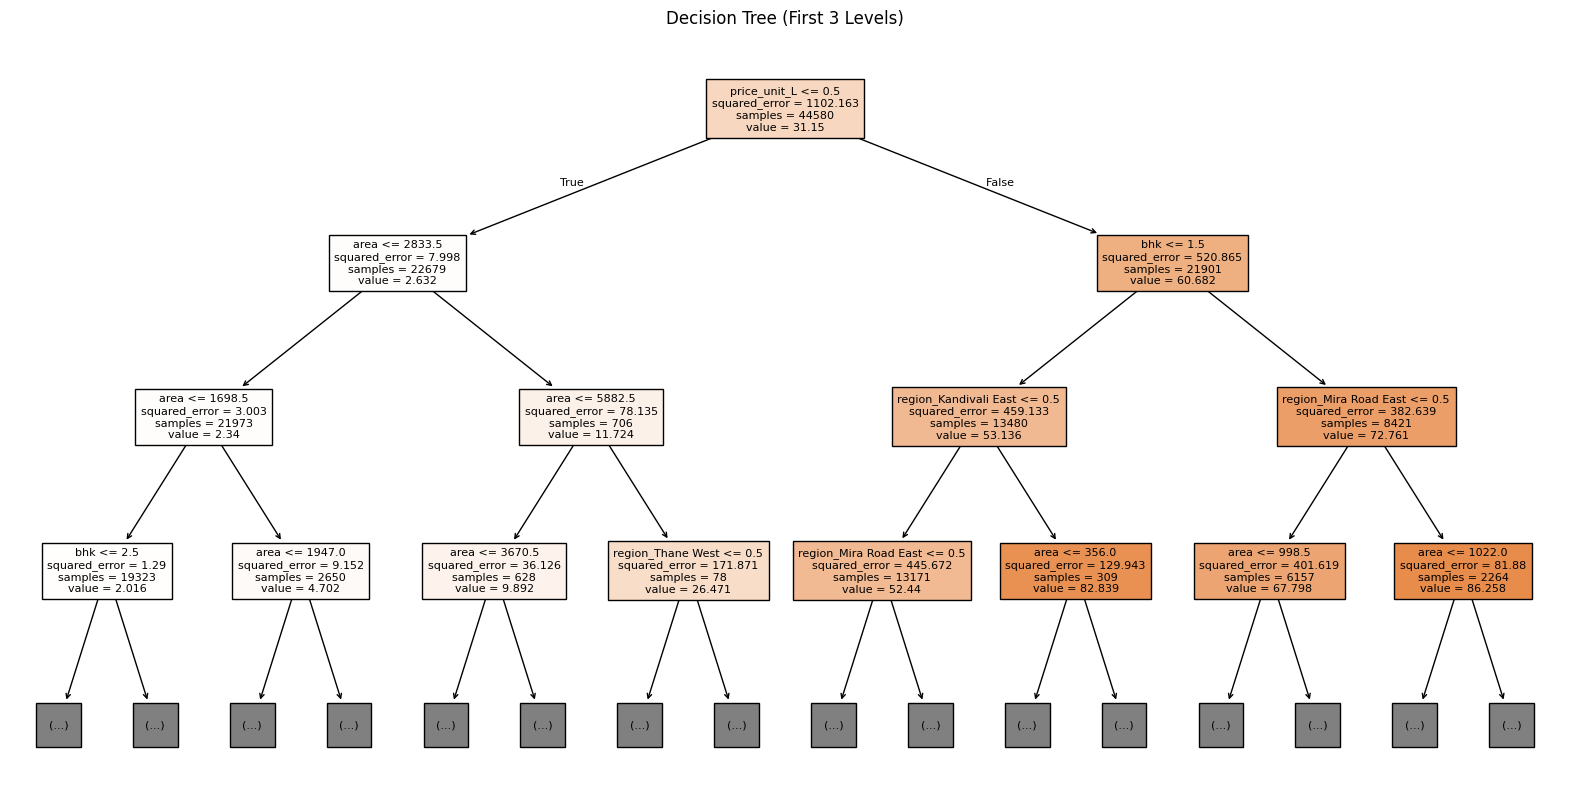

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 1) Feature importance (which features the tree relied on most)
importances = pd.Series(dt.feature_importances_, index=X_encoded.columns)  # map importances to column names
top_k = importances.sort_values(ascending=False).head(15)                  # show top 15 for readability

plt.figure(figsize=(8,6))
top_k.sort_values().plot(kind='barh')                                      # horizontal bar chart
plt.title("Top Feature Importances (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 2) Visualize first few levels of the tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X_encoded.columns, max_depth=3, filled=True, fontsize=8)
plt.title("Decision Tree (First 3 Levels)")
plt.show()


In [11]:
import joblib  # to save the trained model

# Save to a file so we can reuse without retraining
joblib.dump(dt, "mumbai_decision_tree_model.joblib")

print("Saved: mumbai_decision_tree_model.joblib")


Saved: mumbai_decision_tree_model.joblib
